 Import necessary packages

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor
import random
import dask.dataframe as dd
from dask.distributed import Client
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib

import dataset

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/chainhaus/pythoncourse/master/avocado.csv" )
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

Drop coloum name Unnamed

In [3]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
# Number of columns
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
# Number of rows and columns 
df.shape

(18249, 13)

In [6]:
# Findout whether in the dataset having null values or not
df.isnull().values.any()

False

In [7]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
# Describe function used to anaylise the data
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Convert all categorical data into numerical 

In [10]:
dicty={}
for i in df[['type']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'type': {'conventional': 0, 'organic': 1}}

In [11]:
for i in ['type']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


In [12]:
dicty={}
for i in df[['region']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'region': {'Albany': 0,
  'Atlanta': 1,
  'BaltimoreWashington': 2,
  'Boise': 3,
  'Boston': 4,
  'BuffaloRochester': 5,
  'California': 6,
  'Charlotte': 7,
  'Chicago': 8,
  'CincinnatiDayton': 9,
  'Columbus': 10,
  'DallasFtWorth': 11,
  'Denver': 12,
  'Detroit': 13,
  'GrandRapids': 14,
  'GreatLakes': 15,
  'HarrisburgScranton': 16,
  'HartfordSpringfield': 17,
  'Houston': 18,
  'Indianapolis': 19,
  'Jacksonville': 20,
  'LasVegas': 21,
  'LosAngeles': 22,
  'Louisville': 23,
  'MiamiFtLauderdale': 24,
  'Midsouth': 25,
  'Nashville': 26,
  'NewOrleansMobile': 27,
  'NewYork': 28,
  'Northeast': 29,
  'NorthernNewEngland': 30,
  'Orlando': 31,
  'Philadelphia': 32,
  'PhoenixTucson': 33,
  'Pittsburgh': 34,
  'Plains': 35,
  'Portland': 36,
  'RaleighGreensboro': 37,
  'RichmondNorfolk': 38,
  'Roanoke': 39,
  'Sacramento': 40,
  'SanDiego': 41,
  'SanFrancisco': 42,
  'Seattle': 43,
  'SouthCarolina': 44,
  'SouthCentral': 45,
  'Southeast': 46,
  'Spokane': 47,
  'StLouis'

In [13]:
for i in ['region']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Anaylise the dataset with the help of describe funtion

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


Analyise to find correlation and the columns to drop

In [15]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


In [16]:
df.corr()['AveragePrice']

AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
Name: AveragePrice, dtype: float64

Using heatmap to check the corelation on dataset

<AxesSubplot:>

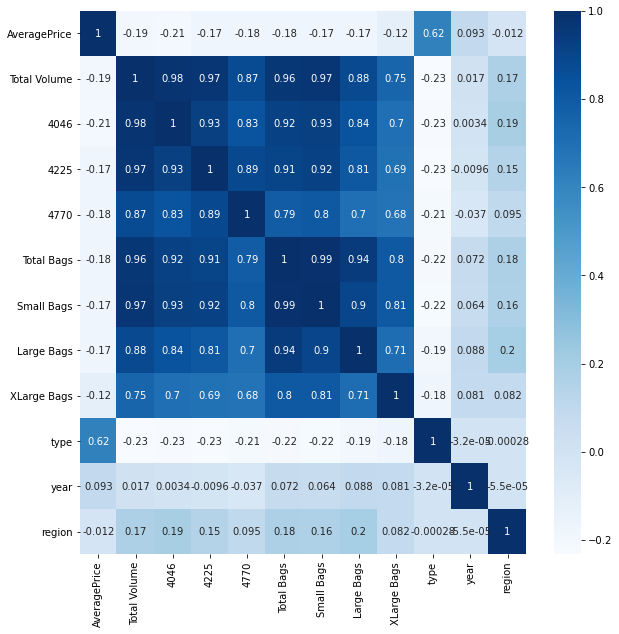

In [17]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Summary of above graph:-
* As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are   correlated with each other. So now I am bit worried because that will not help us get a good model. Lets try and see.

First we have to do some Feature Engineering on the categorical Features : region and type

In [18]:
#Feature Engineering on the categorical Features : region and type

In [19]:
df['region'].nunique()

54

In [20]:
df['type'].nunique()

2

As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [21]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [22]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015


In [23]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018


Check the graphical relation between AveragePrice column with other columns

<AxesSubplot:xlabel='AveragePrice'>

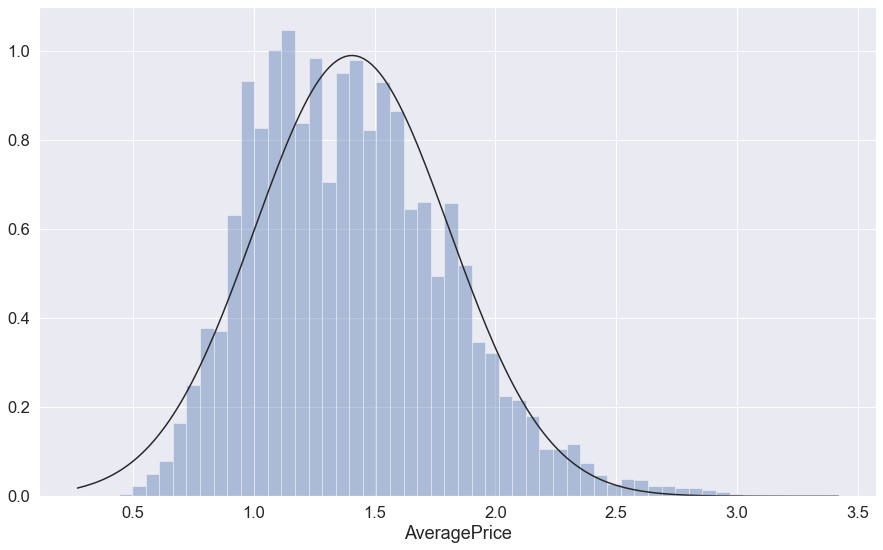

In [24]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Summary of above graph:-
* Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.
* Let's look at average price of conventional vs. organic

Average price is distributed over the months for Conventional and Organic Types

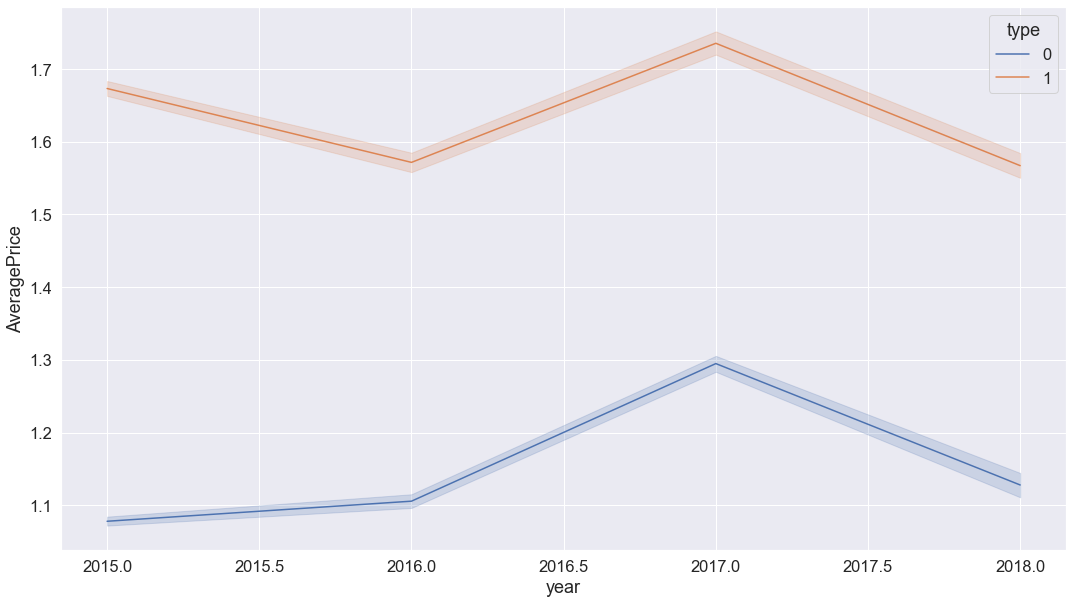

In [25]:
plt.figure(figsize=(18,10))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

Summary of above graph:-
* Looks like there was a hike between years 2016 – 2017 for both Conventional and Organic type of Avocados prices

TOP 5 regions where Average price are very high

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

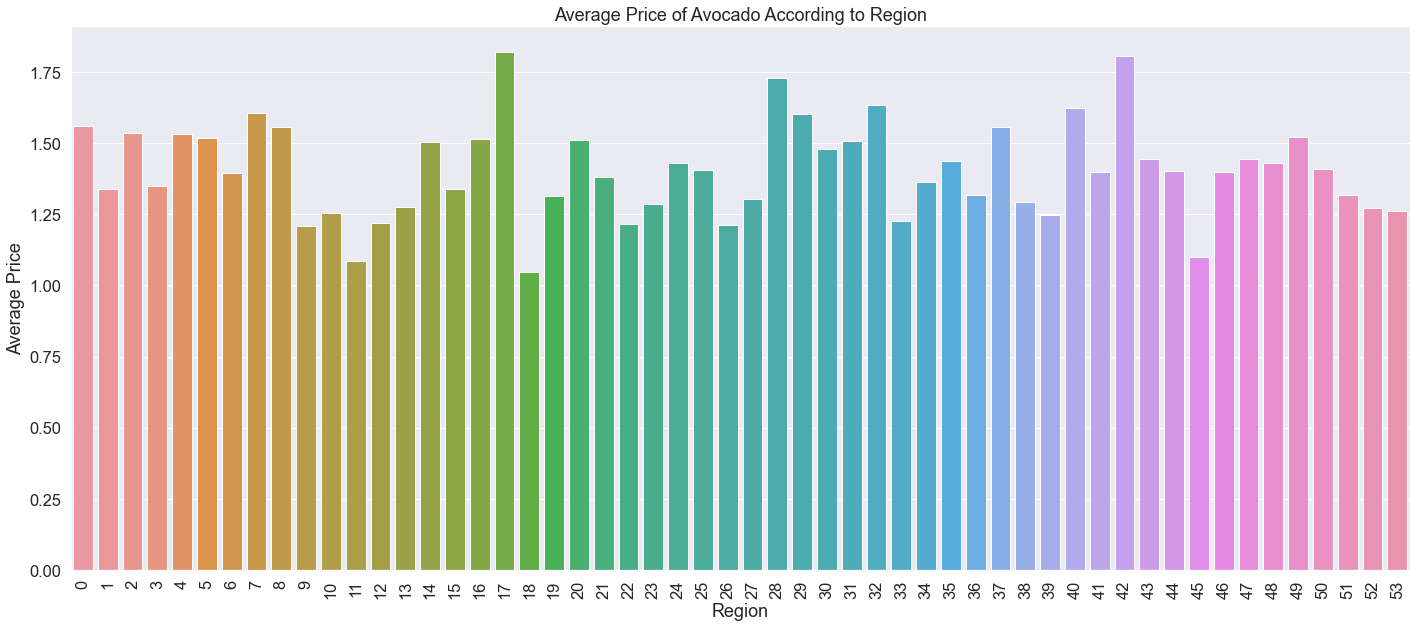

In [26]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Summary of above graph:-
* Looks like these region are where price is very high:- 17, 42, 28, 32, 40
 HartfordSpringfield
 SanFrancisco
 NewYork
 Philadelphia
 Sacramento

TOP 5 regions where Average consumption is very high

Text(0.5, 1.0, 'Average of Total Volume According to Region')

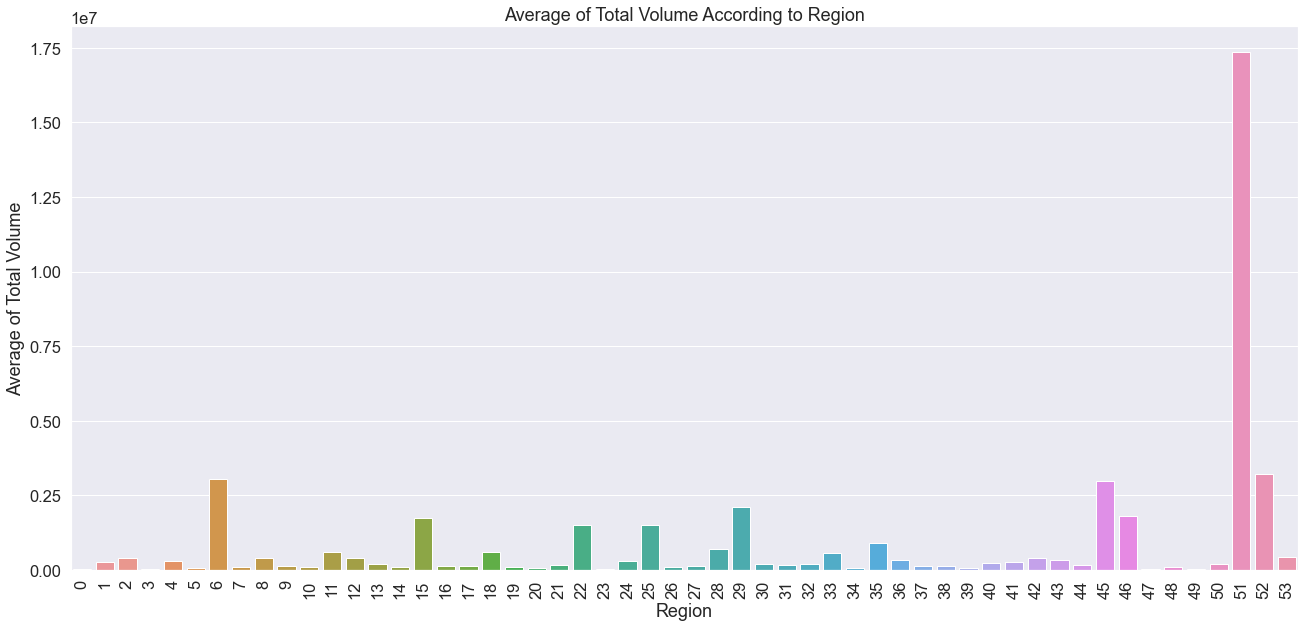

In [27]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Summary of above graph:-
* Looks like these region are where Consumption is very high
West
California
SouthCentral
TotalUS
Northeast

Check the skewness of the dataset

In [28]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [29]:
print(len(x.skew().loc[x.skew()>0.55]))

6


To find the best train test random split

In [11]:
y = df[['AveragePrice']].values
x = df.drop(columns = ['AveragePrice'])

In [12]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,120):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

All models we are going to use to iterate and find the best model

In [13]:
models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

* Instead of finding the best models using whole dataset which will be very computational heavy and would take alot of time to   find best hyperparameters, it will be better to take 10% randomly sampled dataset. using this randomly sampled dataset build   and find best model and then its best hyperparameters and then build that model on the whole dataset,randomly sample dataset   to 10% , preprocess the dataset.
  Find the best model.  

In [14]:
for i in range(len(df.Date)):
    df.Date[i]=int(df.Date[i][5:7])
for i in range(len(df.year)):
    df.year[i]=int(df.year[i]-2000)
dicty={}
for i in df[['type']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
for i in ['type']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
dicty={}
for i in df[['region']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
for i in ['region']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df = df.astype({'Date': np.int})
y = df[['AveragePrice']].values
x = df.drop(columns = ['AveragePrice'])
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])
scaler = StandardScaler()
x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']] = scaler.fit_transform(x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.5738928866166046
r2 0.5574757193960427
diff 0.016417167220561968
mae 0.2075246162168972
rmse 0.2666457772222552
**********
NuSVR()
score 0.4245724426752348
r2 0.4025586798337153
diff 0.022013762841519513
mae 0.24166811981706585
rmse 0.3098230934698556
**********
LinearRegression()
score 0.2579299755850445
r2 0.24527143660510764
diff 0.01265853897993685
mae 0.27579042203953613
rmse 0.34822628624838
**********
Ridge()
score 0.2579299779318379
r2 0.2452717457689313
diff 0.012658232162906624
mae 0.2757903893936671
rmse 0.3482262149253995
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.25792999549795975
r2 0.24527452563067054
diff 0.012655469867289215
mae 0.2757900956112631
rmse 0.34822557362065343
**********
BayesianRidge()
score 0.2579293456926262
r2 0.245296620163034
diff 0.012632725529592215
mae 0.2757877446937166
rmse 0.3482204764444101
**********
SGDRegressor()
score 0.14705171361696248
r2 0.20856673320882702
diff 0.061515019

Summary of the above data is:- 
* Models XGBRegressor(87%),LGBMRegressor(83%) & RandomForestRegressor(86%) are best models with highest accuracy and do not much over or underfitting.

Fine tune those models

In [15]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = RandomizedSearchCV(XGBRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'reg_lambda': 0.26, 'n_estimators': 80, 'max_depth': 7}

In [16]:
parameters={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
clf = RandomizedSearchCV(LGBMRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'colsample_bytree': 0.5460661549742608,
 'min_child_samples': 221,
 'min_child_weight': 1e-05,
 'num_leaves': 39,
 'reg_alpha': 7,
 'reg_lambda': 0,
 'subsample': 0.474141970358406}

In [ ]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

Find the best train test random split for model

In [ ]:
besttrain(LGBMRegressor(),principalComponents,y)

Best random state is 94.

Now, use whole dataset to run preprocess steps and to build models to improve accuracy, use best random state and hyperparameters obtained.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=94, test_size=0.2)
stack = StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.7891315648076571,min_child_samples=202,
 min_child_weight=1,num_leaves= 40,reg_alpha=2,reg_lambda=1,subsample=0.6863980390805567), 
                                        RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=500),
                                        XGBRegressor(max_depth=7,n_estimators=80,reg_lambda=0.26)
                                       ),
                            meta_regressor=LGBMRegressor(colsample_bytree=0.7891315648076571,min_child_samples=202,
 min_child_weight=1,num_leaves= 40,reg_alpha=2,reg_lambda=1,subsample=0.6863980390805567), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

Summary of above is:-
We observe the accuracy of model and we can conclude that this model doesnot have any overfitting or underfitting issue.

Get all the metrics of the currently trained model.

In [ ]:
y_pred=stack.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.7891315648076571,min_child_samples=202,
 min_child_weight=1,num_leaves= 40,reg_alpha=2,reg_lambda=1,subsample=0.6863980390805567), 
                                        RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=500),
                                        XGBRegressor(max_depth=7,n_estimators=80,reg_lambda=0.26)
                                       ),
                            meta_regressor=LGBMRegressor(colsample_bytree=0.7891315648076571,min_child_samples=202,
 min_child_weight=1,num_leaves= 40,reg_alpha=2,reg_lambda=1,subsample=0.6863980390805567), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False),principalComponents,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

Put Average Price column and predicted Average Price column side by side to observe the difference between these two columns

In [ ]:
y_pred=stack.predict(principalComponents)
data=x
data['AveragePricePred']=y_pred
data['AveragePrice']=y
data['differnce']=data['AveragePrice']-data['AveragePricePred']
data

Observing the above dataframe we can see that there is only slight difference between actual and predicted values.

Plot graph to check actual vs predited value

In [ ]:
sn.lmplot(x='AveragePrice',y='AveragePricePred',data=data,palette='rainbow')

Plot appropriate graph to check how similar are y_test and y_pred values

In [ ]:
plt.plot(X_test,y_test,'r*')
plt.plot(X_test,stack.predict(X_test),'b.')
plt.show()

Anaylise how similar dist plot are of actual and predicted values

In [ ]:
sn.distplot(data['AveragePrice'])
sn.distplot(data['AveragePricePred'])

Model has accuracy around 97% to 91%. Model is a combination of RandomForestRegressor, XGBRegressor and LGBMRegressor

Save model

In [ ]:
joblib.dump(stack,'Avocado.pkl')